# step 1:importing libraries

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# step 2:loading dataset

In [9]:
columns = ['id', 'keyword', 'sentiment', 'tweet']

train_df = pd.read_csv("twitter_training.csv", names=columns, header=None)
test_df = pd.read_csv("twitter_validation.csv", names=columns, header=None)

# Strip spaces from column names
# Handle missing tweets safely
train_df['tweet'] = train_df['tweet'].fillna("")
test_df['tweet'] = test_df['tweet'].fillna("")


# step 3:handling missing values

In [10]:
train_df['tweet'].fillna("", inplace=True)
test_df['tweet'].fillna("", inplace=True)

C:\Users\Zeeshan\AppData\Local\Temp\ipykernel_3876\2176410469.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['tweet'].fillna("", inplace=True)
C:\Users\Zeeshan\AppData\Local\Temp\ipykernel_3876\2176410469.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

# step 4:processing text

In [11]:
stop_words = set(stopwords.words('english'))
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

def clean_text(text):
    tokens = tokenizer.tokenize(text)
    words = [w for w in tokens if w.isalpha() and w not in stop_words]
    return " ".join(words)

train_df['cleaned_text'] = train_df['tweet'].apply(clean_text)
test_df['cleaned_text'] = test_df['tweet'].apply(clean_text)

# step 5:visualization

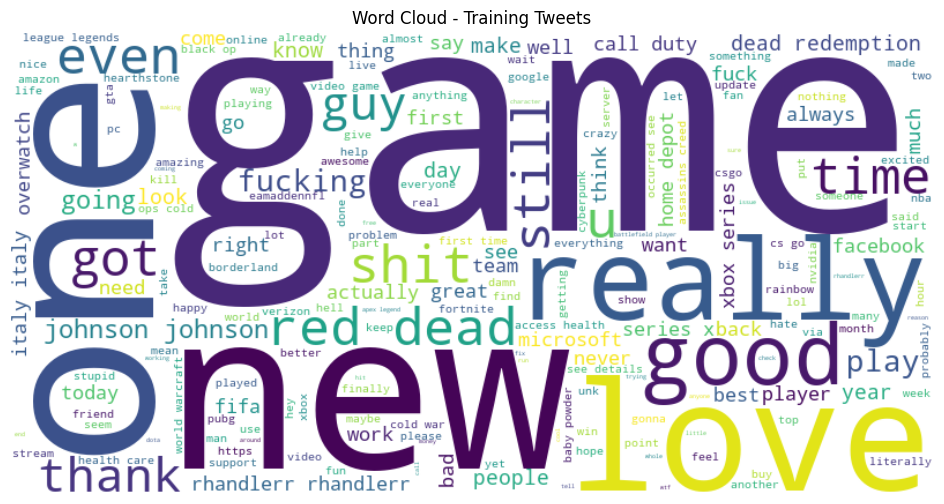

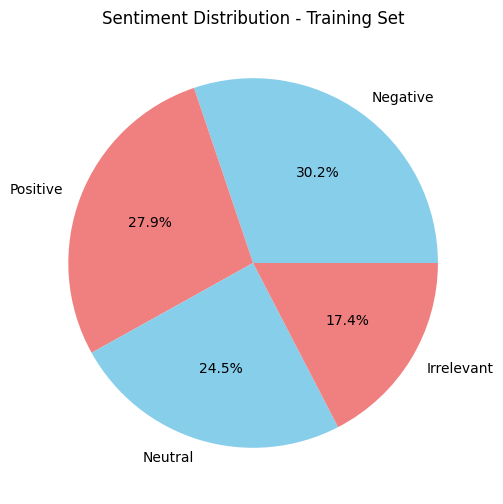

In [12]:
# WordCloud for training tweets
all_words = " ".join(train_df['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      stopwords=STOPWORDS).generate(all_words)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Training Tweets")
plt.show()

# Sentiment distribution pie chart
sent_counts = train_df['sentiment'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(sent_counts, labels=sent_counts.index, autopct='%1.1f%%', colors=['skyblue','lightcoral'])
plt.title("Sentiment Distribution - Training Set")
plt.show()

# step 6:feature extraction

In [13]:
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train = tfidf.fit_transform(train_df['cleaned_text'])
X_test = tfidf.transform(test_df['cleaned_text'])

y_train = train_df['sentiment']
y_test = test_df['sentiment']


# step 7:train model

In [14]:
model = MultinomialNB()
model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


# step 8:evaluate model


Accuracy: 0.705

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.77      0.55      0.64       172
    Negative       0.64      0.82      0.72       266
     Neutral       0.80      0.59      0.68       285
    Positive       0.68      0.81      0.74       277

    accuracy                           0.70      1000
   macro avg       0.72      0.69      0.70      1000
weighted avg       0.72      0.70      0.70      1000



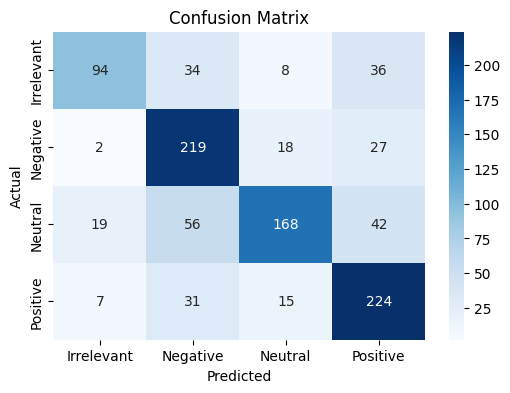

In [15]:
y_pred = model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# step 9:predict new tweet

In [16]:
def predict_sentiment(tweet_text):
    cleaned = clean_text(tweet_text)
    vector = tfidf.transform([cleaned])
    prediction = model.predict(vector)
    return prediction[0]

# Example:
print("\nSample Prediction:", predict_sentiment("I love this product!"))


Sample Prediction: Positive
